### Random Generator Visualizer

This python script will plot the distribution from generated random numbers. 
Input is excpected to be a csv format file.

In [ ]:
# Imports
from mayavi import mlab
from IPython.display import HTML
import ctypes
import functools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [126]:
# Import functions from libft
libft = ctypes.CDLL('../lib/libft/libft.so')

gauss = libft.ft_random_gaussian_value
gauss.restype = ctypes.c_double

standard = libft.ft_random_double
standard.restype = ctypes.c_double

standard_in_range = libft.ft_random_double_in_range
standard_in_range.argtypes = [ctypes.c_double, ctypes.c_double]
standard_in_range.restype = ctypes.c_double


randfunc = lambda x,y: gauss() # standard_in_range(x, y)

In [125]:
class dr:
	ARRAY_SIZE	= 2000								# Array Size
	HIST_SIZE	= 100									# Histogram Size
	bins		= np.linspace(-3, 3, HIST_SIZE)			# Bins for Histogram

	data = np.array([randfunc(-3, 3) \
		for idx in range(ARRAY_SIZE)])					# Current Distribution Record
	last = np.array([np.histogram(data, bins)[0]])	# Previous Distribution Records (array of previous distributions)

# Animate function
def animate(frame_number, bar_container):
		# Simulate new data coming in.
		dr.data = np.array([randfunc(-3, 3) for idx in range(dr.ARRAY_SIZE)])
		n, _ = np.histogram(dr.data, dr.bins)
		dr.last = np.append(dr.last, [n], axis = 0)
		for count, rect in zip(np.mean(dr.last, axis=0), bar_container.patches):
			rect.set_height(count)
		return bar_container.patches

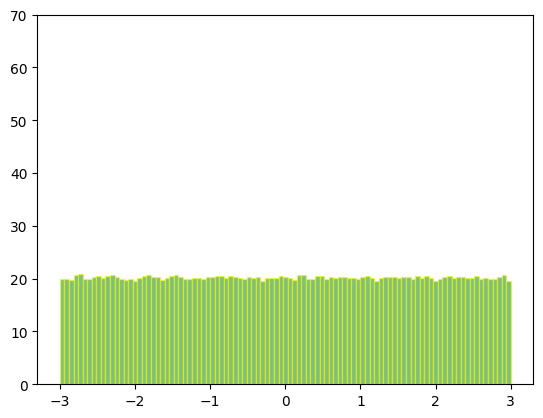

In [119]:
# Plot animation
fig, ax = plt.subplots();
_, _, bar_container = ax.hist(dr.data, dr.bins, lw=1,
						ec="yellow", fc="green", alpha=0.5);
ax.set_ylim(top=70)  # set safe limit to ensure that all data is visible.
anim = functools.partial(animate, bar_container=bar_container);

ani = animation.FuncAnimation(fig, anim, 200, repeat=False, blit=True);

HTML(ani.to_jshtml())

In [127]:
# Create a sphere
r = 1.0
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0:pi:101j, 0:2 * pi:101j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)

# Some lambdas
normalize = lambda x: x / np.linalg.norm(x)
invert = lambda x, n: x * -1 if np.dot(x, n) < 0 else x

# Number of Points
N = 10000

# Surface normal
n = normalize(np.array([0, 1, 1]))


mlab.figure(1, bgcolor=(1, 1, 1), fgcolor=(0, 0, 0), size=(800, 800))
mlab.clf()

vectors = np.array([[randfunc(-1, 1), randfunc(-1, 1), randfunc(-1, 1)] for idx in range(N)])

units = np.array([normalize(x) for x in vectors])
inverted = np.array([invert(x, n) for x in units])

o = units

mlab.mesh(x , y , z, color=(0.0,0.5,0.5))
mlab.points3d(o[:,0], o[:,1], o[:,2], scale_factor=0.01, color=(1,0,0))


mlab.show()
